# Helping Consumers Pick the Best Instant Ramen
### By: Abel Lu

Problem Statement: The objective of this project is to identify trends in the value and ratings of instant ramen noodles over time, and to use these trends to inform average consumers about the price and quality of affordable food options they see in supermarkets. While instant ramen noodles are but a single category of affordable food, they represent a common choice that consumers make when they are looking for a cheap meal.

The data set I'm choosing to analyze for the final project is ramen-ratings.csv, which I found on kaggle: https://www.kaggle.com/datasets/residentmario/ramen-ratings?resource=download. I'm choosing it because I'm a thorough enjoyer of many likes of instant ramen. For me, anything from Samyang Buldak to Maruchan Roast Beef will get it done.

This dataset has columns for the chronologically ordered review number, name, brand, variety (product name), and style (bowl, cup or pack) of the ramen, as well as columns for the country of origin and a star rating assigned to each variety. All columns in the dataset are categorical columns with the exception of the star rating column and the review number column, which are numerical.

From this dataset, I will use the star rating as a reference to find out which countries, brands, and styles produce the highest rated ramen. Additionally, using the chronologically ordered review numbers, I will draw conclusions about how ramen ratings have changed over time.

## Loading in the dataset

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
# Read the csv and view it
ramen = pd.read_csv("ramen-ratings.csv")
ramen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


# Scatter Plot
First, I'll make a scatter plot of the reviews by review number and star rating to visualize the distribution.

In [197]:
# Filter out rows with unrated ramen
ramen = ramen[ramen['Stars'] != 'Unrated']
ramen.Stars = pd.to_numeric(ramen.Stars)
stars = ramen.Stars
review_nums = ramen['Review #']

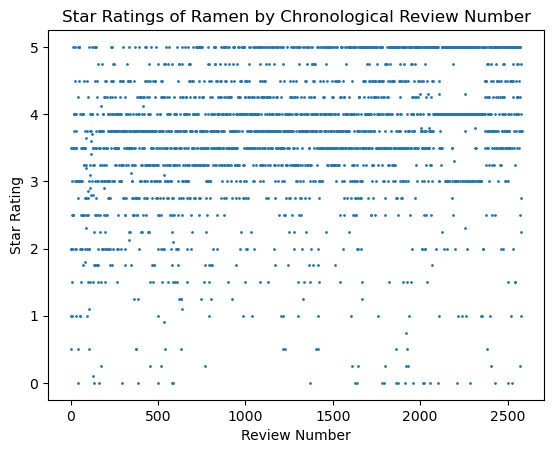

In [198]:
# Create a scatter plot to visualize the data
plt.scatter(review_nums, stars, 1)

plt.title('Star Ratings of Ramen by Chronological Review Number')
plt.xlabel('Review Number')
plt.ylabel('Star Rating')

plt.show()

From this scatter plot, it seems that negative ramen reviews have become less frequent as time has gone on, due to the much lesser amount of 3-or-less star reviews after review number 2000 than before review number 500.

# Bar Graphs
To visualize this trend more effectively, I will make bar graph of positive and negative reviews over time.
First, I will define a **positive review** as one that has a *star rating higher than the median star rating*, which is calculated below:

In [199]:
# Calculate the median star rating
MEDIAN_STARS = ramen.Stars.median()
print(f"Median Stars: {MEDIAN_STARS}")

Median Stars: 3.75


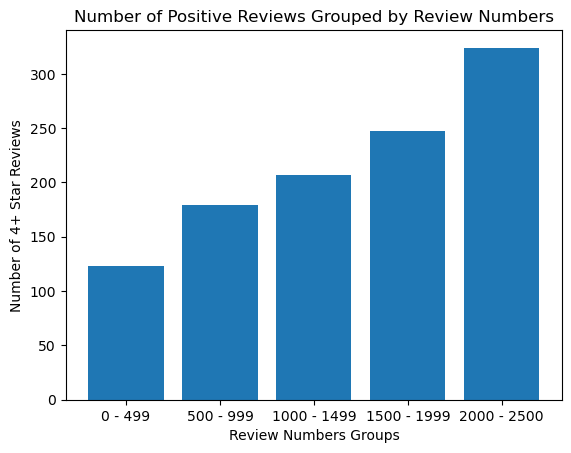

In [203]:
# Create 5 groups, each representing 500 reviews, then filtering them for positive reviews
group_1 = ramen[(ramen['Review #'] < 500) & (ramen.Stars > MEDIAN_STARS)]
group_2 = ramen[(ramen['Review #'] >= 500) & (ramen['Review #'] < 1000) & (ramen.Stars > MEDIAN_STARS)]
group_3 = ramen[(ramen['Review #'] >= 1000) & (ramen['Review #'] < 1500) & (ramen.Stars > MEDIAN_STARS)]
group_4 = ramen[(ramen['Review #'] >= 1500) & (ramen['Review #'] < 2000) & (ramen.Stars > MEDIAN_STARS)]
group_5 = ramen[(ramen['Review #'] >= 2000) & (ramen['Review #'] < 2500) & (ramen.Stars > MEDIAN_STARS)]

# Create a bar graph of the data
plt.bar(['0 - 499', '500 - 999', '1000 - 1499', '1500 - 1999', '2000 - 2500'],
        [len(group_1), len(group_2), len(group_3), len(group_4), len(group_5)])

# Title the graph and label the axes
plt.title('Number of Positive Reviews Grouped by Review Numbers')
plt.xlabel("Review Numbers Groups")
plt.ylabel("Number of 4+ Star Reviews")

plt.show()

This bar graph confirms the earlier observation that ramen star ratings have increased over time, as the sections of the bar graph representing higher review numbers (reviews later in time) have much higher bars, which represent a greater amount of positive reviews.

Next, I will define a **negative review** as one that has a *star rating lower than the median star rating*, and create a bar graph based on this definition.

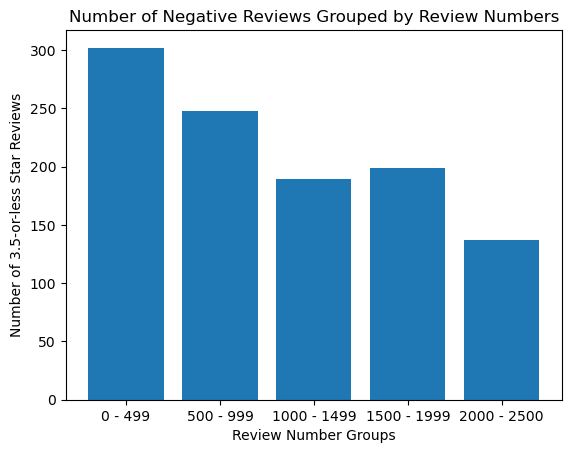

In [206]:
# Create 5 groups, each representing 500 reviews, then filtering them for regative reviews
group_1 = ramen[(ramen['Review #'] < 500) & (ramen.Stars < MEDIAN_STARS)]
group_2 = ramen[(ramen['Review #'] >= 500) & (ramen['Review #'] < 1000) & (ramen.Stars < MEDIAN_STARS)]
group_3 = ramen[(ramen['Review #'] >= 1000) & (ramen['Review #'] < 1500) & (ramen.Stars < MEDIAN_STARS)]
group_4 = ramen[(ramen['Review #'] >= 1500) & (ramen['Review #'] < 2000) & (ramen.Stars < MEDIAN_STARS)]
group_5 = ramen[(ramen['Review #'] >= 2000) & (ramen['Review #'] < 2500) & (ramen.Stars < MEDIAN_STARS)]

# Create a bar graph of the data
plt.bar(['0 - 499', '500 - 999', '1000 - 1499', '1500 - 1999', '2000 - 2500'],
        [len(group_1), len(group_2), len(group_3), len(group_4), len(group_5)])

# Title the graph and label the axes
plt.title('Number of Negative Reviews Grouped by Review Numbers')
plt.xlabel("Review Number Groups")
plt.ylabel("Number of 3.5-or-less Star Reviews")

plt.show()

This bar graph shows that negative reviews of ramen has decreased over time.

Next, I will create bar charts showing the number and percentage of positive reviews based on the packaging that the ramen comes in.

In [207]:
# Separate the dataframe by the three most common packaging styles
all_cups = ramen[ramen.Style == "Cup"]
all_packs = ramen[ramen.Style == "Pack"]
all_bowls = ramen[ramen.Style == "Bowl"]

# Calculate the numbers of positive reviews per packaging style
good_cups = all_cups[ramen.Stars > MEDIAN_STARS]
good_packs = all_packs[ramen.Stars > MEDIAN_STARS]
good_bowls = all_bowls[ramen.Stars > MEDIAN_STARS]

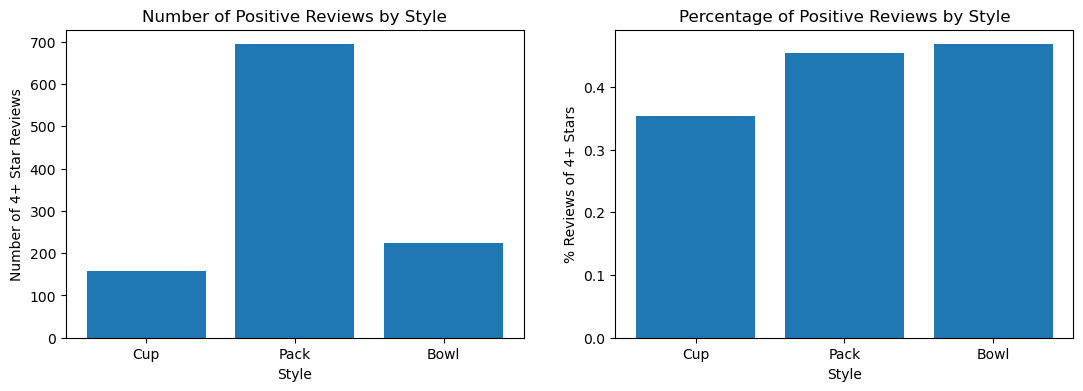

In [208]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(13, 4)

# Graph number of positive reviews by style
ax1.bar(['Cup', 'Pack', 'Bowl'],
        [len(good_cups), len(good_packs), len(good_bowls)])

ax1.set_title('Number of Positive Reviews by Style')
ax1.set_xlabel("Style")
ax1.set_ylabel("Number of 4+ Star Reviews")

# Graph percentage of positive reviews by style
ax2.bar(['Cup', 'Pack', 'Bowl'],
        [len(good_cups) / len(all_cups), len(good_packs) / len(all_packs), len(good_bowls) / len(all_bowls)])

ax2.set_title('Percentage of Positive Reviews by Style')
ax2.set_xlabel("Style")
ax2.set_ylabel("% Reviews of 4+ Stars")

plt.show()

From these graphs, we can see that while packs are the most widely available option, bowls have a slightly higher percentage of positive ratings.

Next, I will create the same bar graph, but based on country instead of packaging style.

In [187]:
# "USA" and "United States" both appear as countries in the dataset
ramen['Country'] = ramen['Country'].replace('USA', 'United States')

In [188]:
# Creating three parallel arrays to represent the names, counts of total reviews, and counts of positive reviews for each country.
countries = ramen['Country'].unique()
countries_total_reviews = np.array([len(ramen[ramen['Country'] == country]) for country in countries])
countries_good_reviews = np.array([len(ramen[(ramen['Country'] == country) & (ramen.Stars > MEDIAN_STARS)]) for country in countries])

In [189]:
# Here, I sort the parallel arrays so the countries with the highest number of positive reviews appear first.
indices = np.argsort(countries_good_reviews)

countries = countries[indices][::-1]
countries_total_reviews = countries_total_reviews[indices][::-1]
countries_good_reviews = countries_good_reviews[indices][::-1]

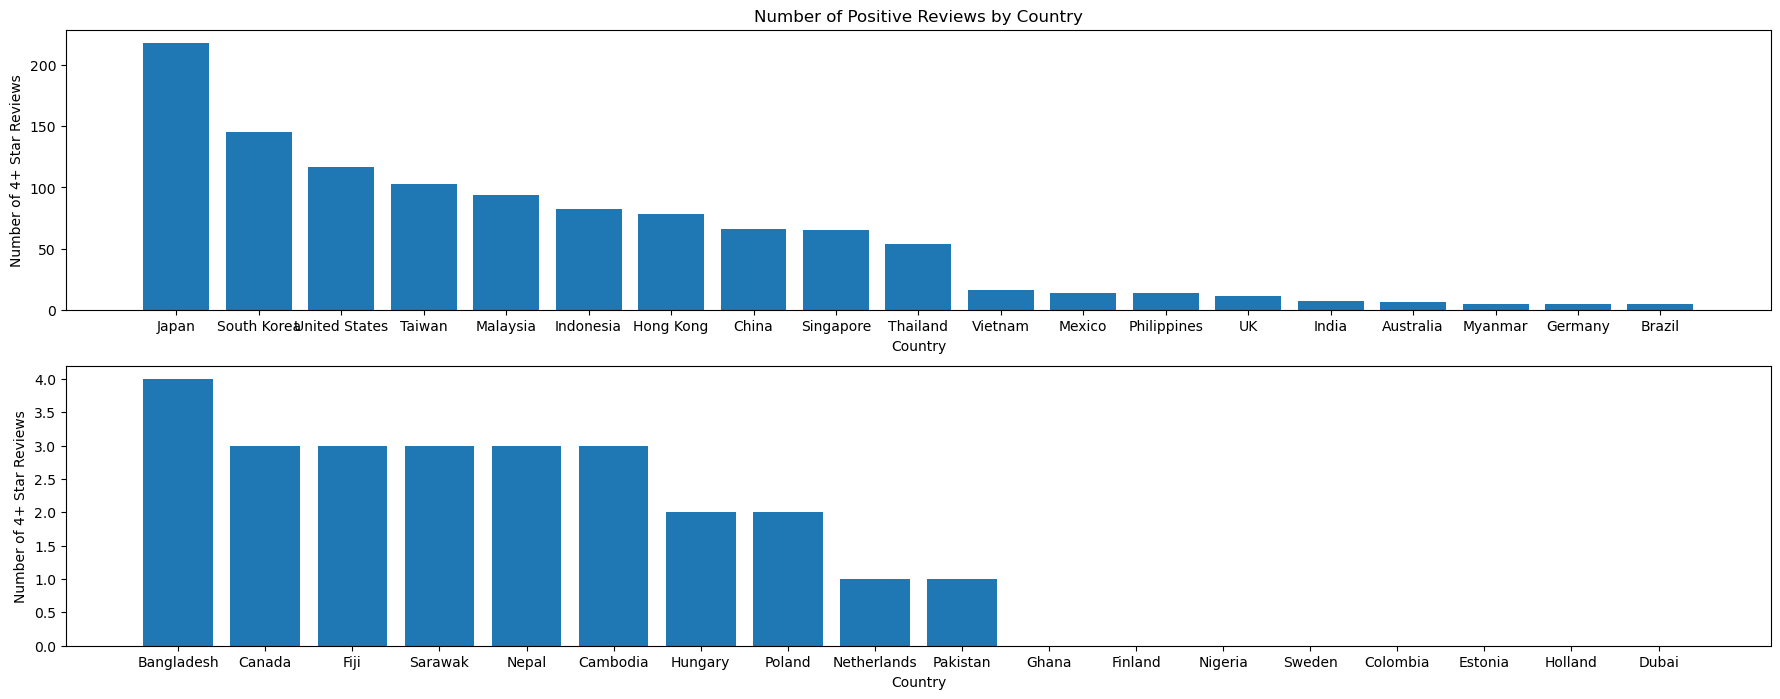

In [190]:
# I split my graph into two subplots because it was too big
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(22, 8)

ax1.bar(countries[:19],
        countries_good_reviews[:19])

ax1.set_title('Number of Positive Reviews by Country')
ax1.set_xlabel("Country")
ax1.set_ylabel("Number of 4+ Star Reviews")

ax2.bar(countries[19:],
        countries_good_reviews[19:])

ax2.set_xlabel("Country")
ax2.set_ylabel("Number of 4+ Star Reviews")

plt.show()

In [192]:
# Calculating the percentage of positive reviews and creating another parallel array for it
countries_good_percentage = countries_good_reviews / countries_total_reviews

# Sorting the parallel arrays
indices = np.argsort(countries_good_percentage)

countries = countries[indices][::-1]
countries_total_reviews = countries_total_reviews[indices][::-1]
countries_good_reviews = countries_good_reviews[indices][::-1]
countries_good_percentage = countries_good_percentage[indices][::-1]

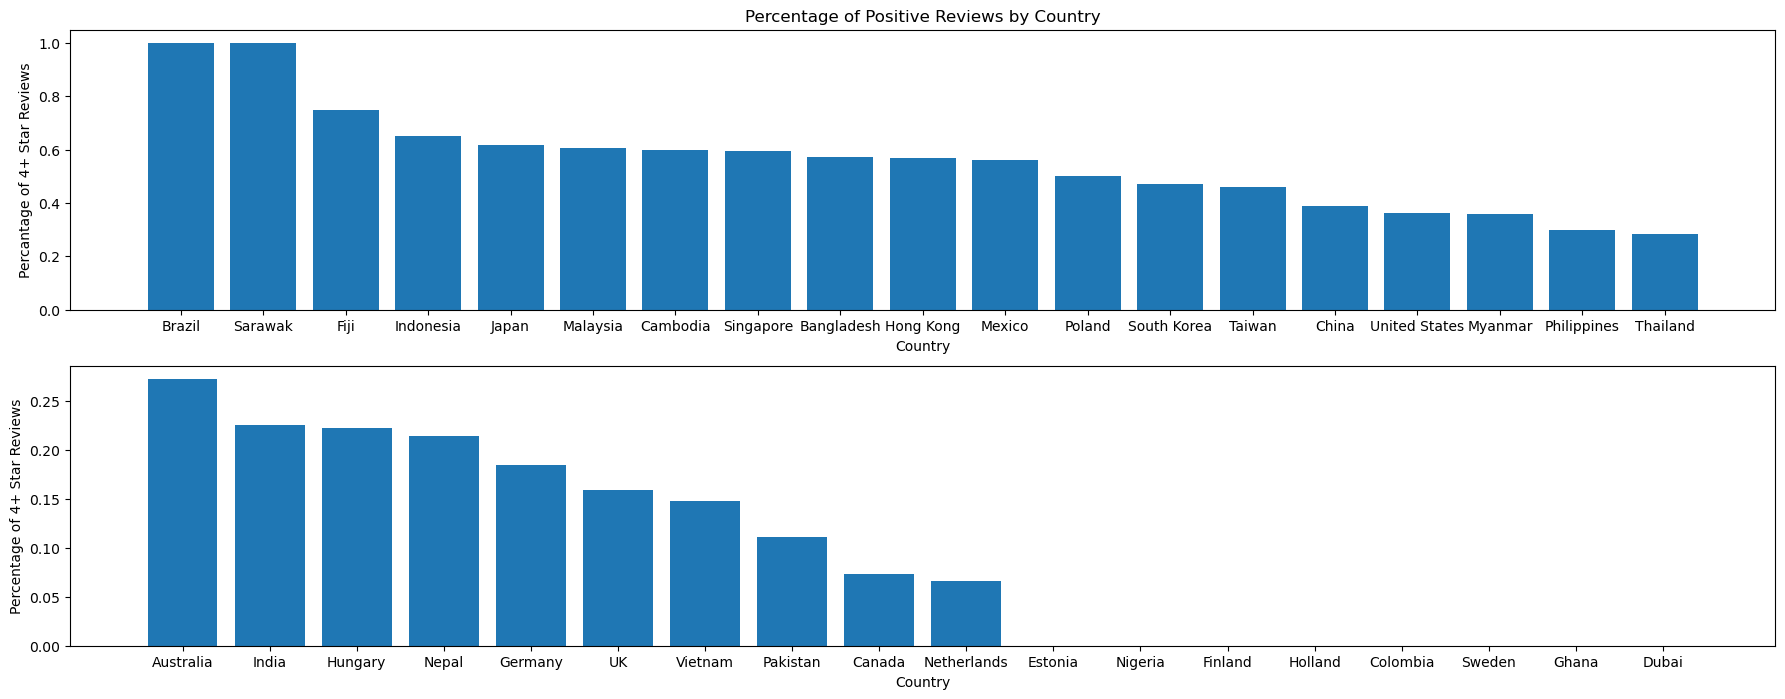

In [193]:
# Same graph as above, but for percentage of positive reviews instead of number.
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(22, 8)

ax1.bar(countries[:19],
        countries_good_reviews[:19] / countries_total_reviews[:19])

ax1.set_title('Percentage of Positive Reviews by Country')
ax1.set_xlabel("Country")
ax1.set_ylabel("Percantage of 4+ Star Reviews")

ax2.bar(countries[19:],
        countries_good_reviews[19:] / countries_total_reviews[19:])

ax2.set_xlabel("Country")
ax2.set_ylabel("Percentage of 4+ Star Reviews")

plt.show()

Based on the bar graphs above, we can see that while ramen from Japanese tends to be the most widely available, ramen from Brazil and Sarawak have the highest percentage of positively reviewed ramen.